In [1]:
### Importing libraries
import numpy as np 
import pandas as pd 


from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [2]:
df = pd.read_csv('Spam.csv')
print(df.shape)

df.head()

(5570, 2)


,Category,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isnull().sum()

Category    0
Messages    1
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

Category    0
Messages    0
dtype: int64

<Axes: xlabel='Category'>

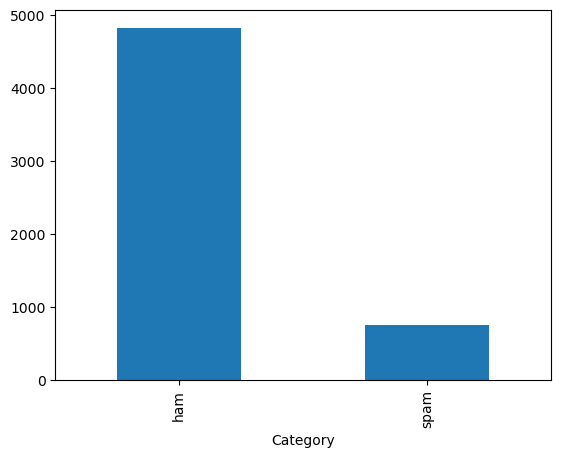

In [5]:
df.value_counts('Category').plot(kind='bar')

This Dataset is Imbalanced

In [6]:
#### Preprocess the text data
ps = PorterStemmer()
corpus = []
def preprocess(text):
    
    ### only considering the alphabet
    text = re.sub('[^a-zA-Z]', ' ',text)
    
    #### lower case
    text = text.lower()
    text = text.split()

    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    
    return text

In [7]:
df['Preprocessed_Messages'] = df['Messages'].apply(preprocess)

In [8]:
## now Converting the Category column to numerical
map_dict = {'ham':0,
         'spam':1}
df['Category_numerical'] = df.Category.map(map_dict)

In [9]:
df.head()

,Category,Messages,Preprocessed_Messages,Category_numerical
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,0


In [10]:
### performing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Preprocessed_Messages	,
                                                 df.Category_numerical,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=df.Category_numerical)

In [11]:
x_train.shape,x_test.shape

((4455,), (1114,))

In [12]:
multi_nb = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('Multi_NB', MultinomialNB())         
])

multi_nb.fit(x_train, y_train)


y_pred_mnb = multi_nb.predict(x_test)

print(f'multi naive bayes precision: {precision_score(y_test,y_pred_mnb)}')
print(f'multi naive bayes accuracy: {accuracy_score(y_test,y_pred_mnb)}')

multi naive bayes precision: 0.991304347826087
multi naive bayes accuracy: 0.9676840215439856


Text(95.72222222222221, 0.5, 'Truth')

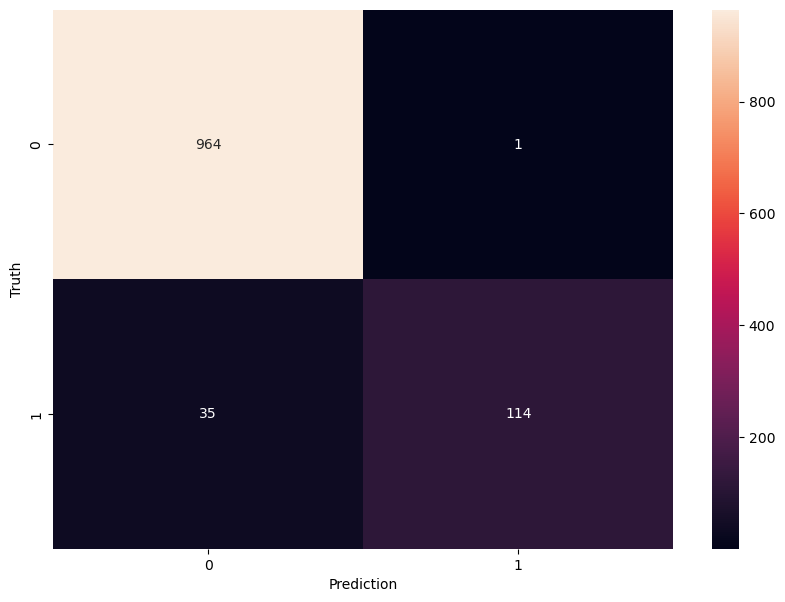

In [13]:
confusion_mat = confusion_matrix(y_test, y_pred_mnb)


plt.figure(figsize = (10,7))
sn.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [14]:
rfc = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('rf', RandomForestClassifier(random_state=42))         
])

rfc.fit(x_train, y_train)


y_pred_rfc = rfc.predict(x_test)

print(f'RandomForest Classifier precision: {precision_score(y_test,y_pred_rfc)}')
print(f'RandomForest Classifier accuracy: {accuracy_score(y_test,y_pred_rfc)}')

RandomForest Classifier precision: 1.0
RandomForest Classifier accuracy: 0.9730700179533214


Text(95.72222222222221, 0.5, 'Truth')

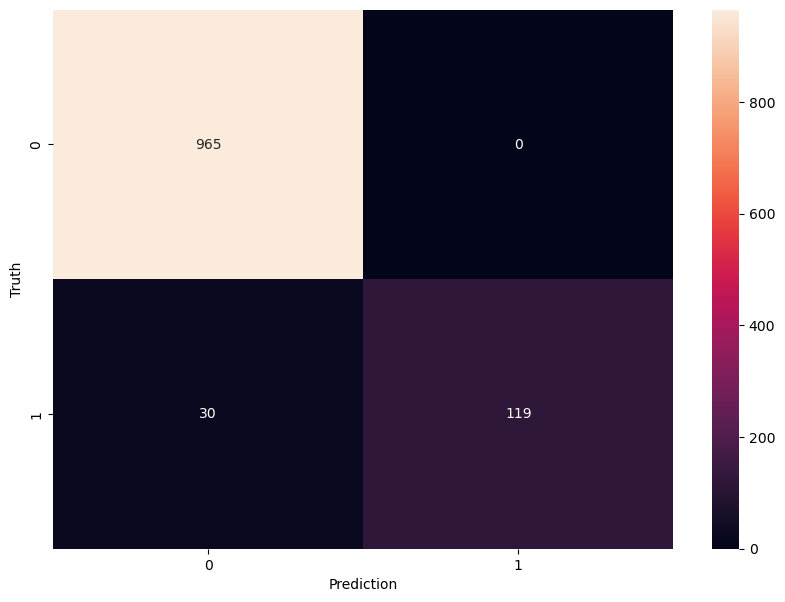

In [15]:
confusion_mat = confusion_matrix(y_test, y_pred_rfc)


plt.figure(figsize = (10,7))
sn.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [16]:
lr = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('log_reg', LogisticRegression())         
])

lr.fit(x_train, y_train)


y_pred_lr = lr.predict(x_test)

print(f'Logistic Regression precision: {precision_score(y_test,y_pred_lr)}')
print(f'Logistic Regression accuracy: {accuracy_score(y_test,y_pred_lr)}')

Logistic Regression precision: 0.9745762711864406
Logistic Regression accuracy: 0.966786355475763


Text(95.72222222222221, 0.5, 'Truth')

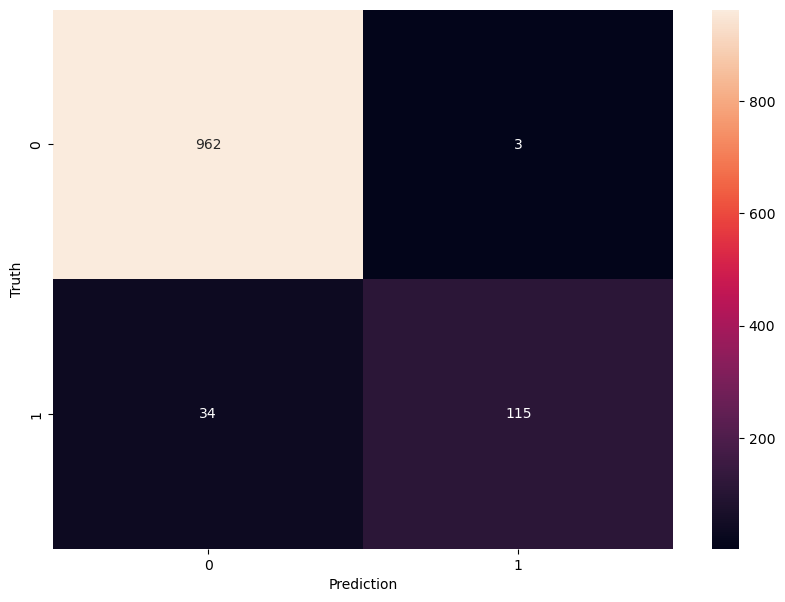

In [17]:
confusion_mat = confusion_matrix(y_test, y_pred_lr)


plt.figure(figsize = (10,7))
sn.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [18]:
report_df = pd.DataFrame({'model':['Random Forest', 'Multi Naive Bayes','Logistic Regression'],
                          'Precision': [precision_score(y_test,y_pred_rfc),precision_score(y_test,y_pred_mnb),precision_score(y_test,y_pred_lr)],
                          'Accuracy':[accuracy_score(y_test,y_pred_rfc),accuracy_score(y_test,y_pred_mnb),accuracy_score(y_test,y_pred_lr)]})
report_df

,model,Precision,Accuracy
0,Random Forest,1.000000,0.973070
1,Multi Naive Bayes,0.991304,0.967684
2,Logistic Regression,0.974576,0.966786


From This Result it is clear that Random Forest Classifier give best precision score with good accuracy.

In [20]:
import pickle
pickle.dump(rfc,open('Spam_Email_classifier.pkl','wb'))